In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
data.shape

(397, 6)

In [4]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
data.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [6]:
data.sample(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
394,Prof,A,42,25,Male,101738
53,Prof,B,16,9,Male,106639
34,AsstProf,B,4,2,Female,80225
126,Prof,A,28,26,Male,155500
286,Prof,A,28,27,Male,115800


In [7]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

## EDA

### Checking Null values

In [8]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Here, it show that there is no null values present in dataset.

### Checking the datatypes of the columns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


 - No null values present.
 - Datatype is ok with respective their column.

## Visualization of the data

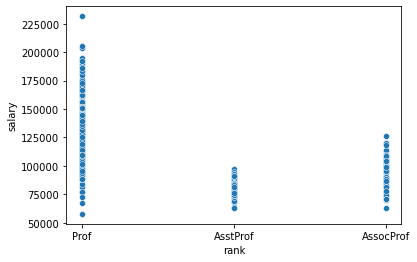

In [10]:
sns.scatterplot(x='rank',y='salary',data=data)
plt.show()

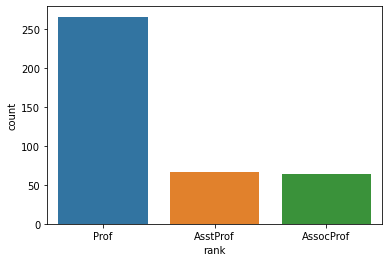

In [11]:
sns.countplot(x='rank',data=data)
plt.show()

  - Professors have more salary then Associate Professors and Assistance Professors.


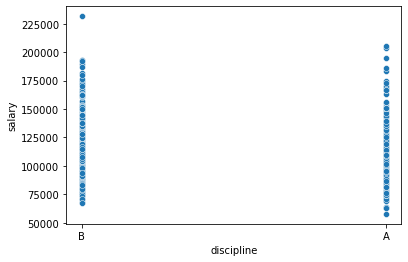

In [12]:
sns.scatterplot(x='discipline',y='salary',data=data)
plt.show()

 - We can see the salary is equally distributed in the range of 65000 to 190000 for both discipline

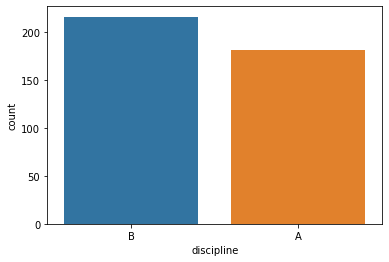

In [13]:
sns.countplot(x='discipline',data=data)
plt.show()

  - Discipline B is equal to discipline A upto 0 to 160.

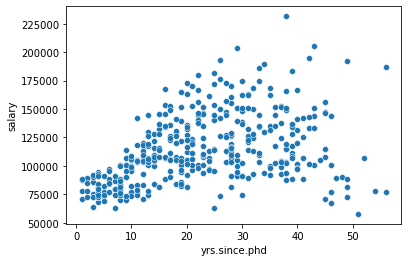

In [14]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=data)
plt.show()

 - Year since phd is increasing then salary also increases.
 - 15 to 45 year since phd have good salary.

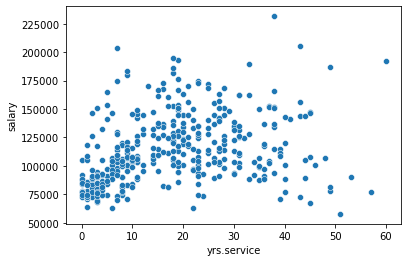

In [15]:
sns.scatterplot(x='yrs.service',y='salary',data=data)
plt.show()

 - Year of Service is increases then salary also increases.
 - 5 to 45 year service have more salary.

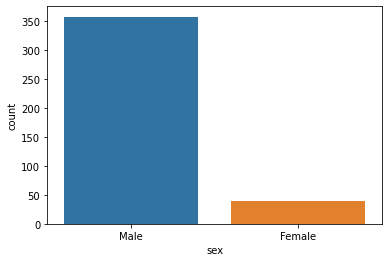

In [16]:
sns.countplot(x='sex',data=data)
plt.show()

  - Male professonal is more than female.

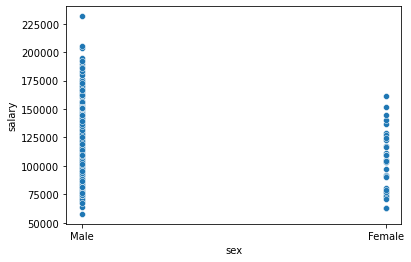

In [17]:
sns.scatterplot(x='sex',y='salary',data=data)
plt.show()

 - Male have more salary then female.
 - Male and Female have equal salary in the range of 60000 to 16000.

### Checking the distribution of the continuous values

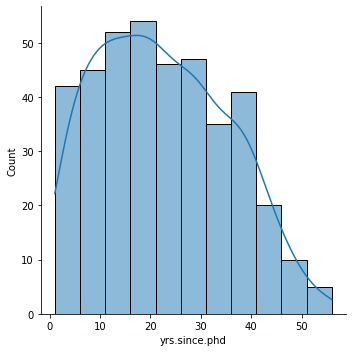

In [18]:
sns.displot(data['yrs.since.phd'], kde=True)
plt.show()

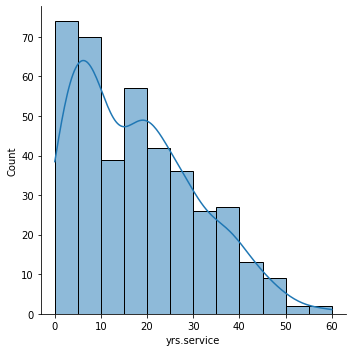

In [19]:
sns.displot(data['yrs.service'], kde=True)
plt.show()

Both features have some skewness.

## Encoding of DataFrame

In [20]:
df1 = pd.get_dummies(data[['rank','discipline','sex']],drop_first=True)
df1

,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,0,1,1,1
1,0,1,1,1
2,1,0,1,1
3,0,1,1,1
4,0,1,1,1
...,...,...,...,...
392,0,1,0,1
393,0,1,0,1
394,0,1,0,1
395,0,1,0,1


In [21]:
data = data.join(df1)
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,Prof,B,19,18,Male,139750,0,1,1,1
1,Prof,B,20,16,Male,173200,0,1,1,1
2,AsstProf,B,4,3,Male,79750,1,0,1,1
3,Prof,B,45,39,Male,115000,0,1,1,1
4,Prof,B,40,41,Male,141500,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106,0,1,0,1
393,Prof,A,31,19,Male,150564,0,1,0,1
394,Prof,A,42,25,Male,101738,0,1,0,1
395,Prof,A,25,15,Male,95329,0,1,0,1


In [22]:
data = data.drop(columns=['rank','discipline','sex'],axis=1)
data.head()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1


## Correlation of the columns with the target column

In [23]:
data.corr()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
yrs.since.phd,1.000000,0.909649,0.419231,-0.602513,0.662719,-0.218087,0.148788
yrs.service,0.909649,1.000000,0.334745,-0.528702,0.570572,-0.164599,0.153740
salary,0.419231,0.334745,1.000000,-0.490502,0.615458,0.156084,0.138610
rank_AsstProf,-0.602513,-0.528702,-0.490502,1.000000,-0.642075,0.088399,-0.099830
rank_Prof,0.662719,0.570572,0.615458,-0.642075,1.000000,-0.104606,0.146347
discipline_B,-0.218087,-0.164599,0.156084,0.088399,-0.104606,1.000000,0.003724
sex_Male,0.148788,0.153740,0.138610,-0.099830,0.146347,0.003724,1.000000


In [24]:
data.corr()['salary'].sort_values()

rank_AsstProf   -0.490502
sex_Male         0.138610
discipline_B     0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank_Prof        0.615458
salary           1.000000
Name: salary, dtype: float64

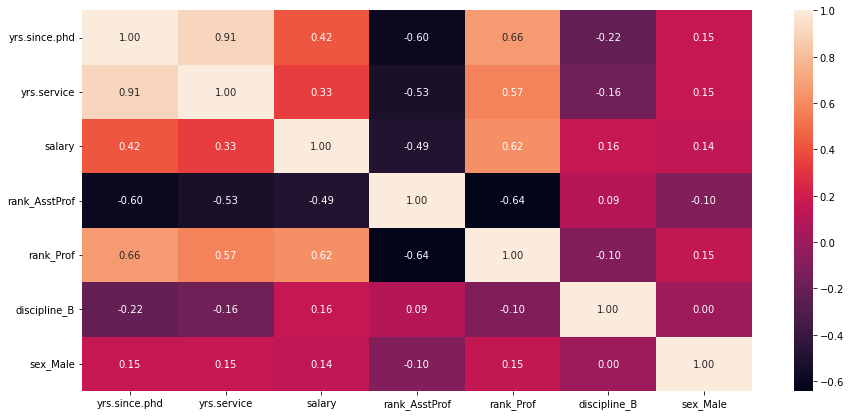

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation:



  1. yrs.since.phd has 42% correlation with the target column.
  2. yrs.service has 33% correlation with the target column.
  3. rank_AsstProf has 49% negative correlation with the target column.
  4. rank_Prof has 62% Positive correlation with the target column.
  5. discipline_B has 16% positive correlation with target column.
  6. sex_Male has 14% positive correlation with target column.

Yrs.since.phd is have highly(91%) correlation with feature yrs.service

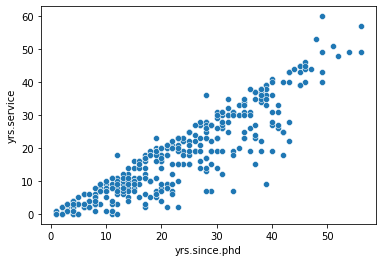

In [26]:
sns.scatterplot(x='yrs.since.phd',y='yrs.service',data=data)
plt.show()

  - we can see the both features are correlated to each other so we will drop one of the feature.

### Describing Dataset

In [27]:
data.describe()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438,0.168766,0.670025,0.544081,0.901763
std,12.887003,13.006024,30289.038695,0.375017,0.470797,0.498682,0.298010
min,1.000000,0.000000,57800.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,7.000000,91000.000000,0.000000,0.000000,0.000000,1.000000
50%,21.000000,16.000000,107300.000000,0.000000,1.000000,1.000000,1.000000
75%,32.000000,27.000000,134185.000000,0.000000,1.000000,1.000000,1.000000
max,56.000000,60.000000,231545.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   yrs.since.phd  397 non-null    int64
 1   yrs.service    397 non-null    int64
 2   salary         397 non-null    int64
 3   rank_AsstProf  397 non-null    uint8
 4   rank_Prof      397 non-null    uint8
 5   discipline_B   397 non-null    uint8
 6   sex_Male       397 non-null    uint8
dtypes: int64(3), uint8(4)
memory usage: 11.0 KB


## Checking Outliers

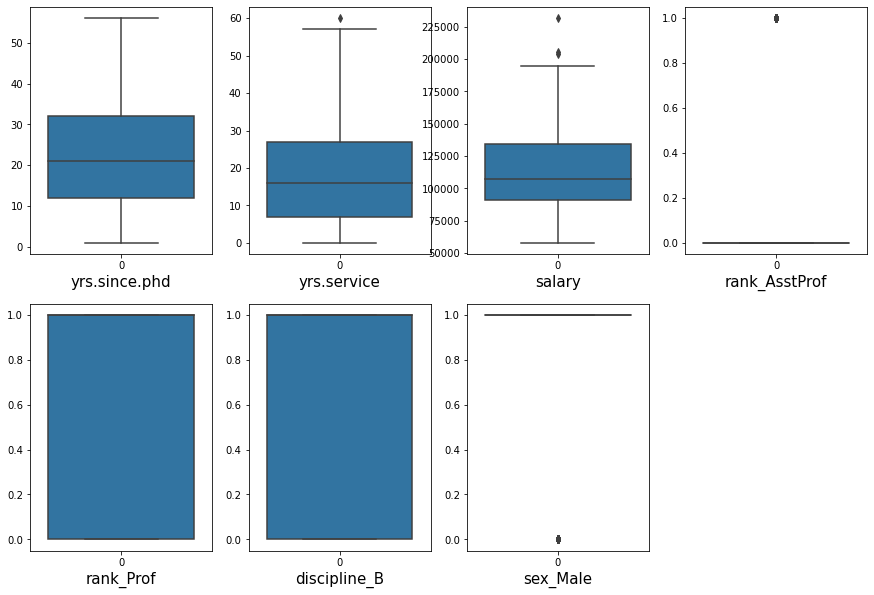

In [29]:
plt.figure(figsize=(15,10))
graph = 1

for column in data:
    if graph<=8:
        plt.subplot(2,4,graph)
        ax = sns.boxplot(data = data[column])
        plt.xlabel(column,fontsize=15)
    graph +=1
plt.show()    


  - Year service and sex_Male have very less outliers but sex_Male is categorical feature so,we are not removing outliers from sex_Male.
  - Salary also have some outliers

In [30]:
data.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
rank_AsstProf    1.775445
rank_Prof       -0.725944
discipline_B    -0.177684
sex_Male        -2.709958
dtype: float64

 - Outcome of the skewness: Skewness threshold is taken is +/-0.65. 
 - Skewness checking only for continuous features.
 - salary have some skewness

In [31]:
from scipy.stats import zscore

z_score = zscore(data[['salary']])   # Considering salary
abs_z_score = np.abs(z_score)    

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]

df.describe()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,22.222785,17.498734,113175.744304,0.169620,0.668354,0.544304,0.901266
std,12.852975,12.934896,29413.790910,0.375775,0.471401,0.498665,0.298683
min,1.000000,0.000000,57800.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,7.000000,91000.000000,0.000000,0.000000,0.000000,1.000000
50%,21.000000,16.000000,107200.000000,0.000000,1.000000,1.000000,1.000000
75%,31.500000,26.000000,133950.000000,0.000000,1.000000,1.000000,1.000000
max,56.000000,60.000000,204000.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.shape

(395, 7)

In [33]:
df.head()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1


####  Percentage loss of data

In [34]:
data_loss = ((397 - 395)/397)*100

In [35]:
data_loss

0.5037783375314862

### Separating columns into features and label

In [36]:
# Independent column

x = df.drop(['salary','yrs.service',],axis=1)
x

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1
1,20,0,1,1,1
2,4,1,0,1,1
3,45,0,1,1,1
4,40,0,1,1,1
...,...,...,...,...,...
392,33,0,1,0,1
393,31,0,1,0,1
394,42,0,1,0,1
395,25,0,1,0,1


In [37]:
# Target
y = df['salary']
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 395, dtype: int64

In [38]:
from sklearn.preprocessing import power_transform

In [39]:
x = power_transform(x,method='yeo-johnson')

In [40]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.11958483, -0.4519605 ,  0.70442325,  0.91499142,  0.33098423],
       [-0.04134659, -0.4519605 ,  0.70442325,  0.91499142,  0.33098423],
       [-1.62645362,  2.21258274, -1.41960106,  0.91499142,  0.33098423],
       ...,
       [ 1.40329596, -0.4519605 ,  0.70442325, -1.09290642,  0.33098423],
       [ 0.3283863 , -0.4519605 ,  0.70442325, -1.09290642,  0.33098423],
       [-1.13040034,  2.21258274, -1.41960106, -1.09290642,  0.33098423]])

### LinearRegression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
lr = LinearRegression()

### Finding Best Random state

In [43]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.6349256949887987 on Random State 253


In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=253)

In [45]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XG Boost Regressor' : XGBRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [46]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,12627.874,2.967005e+08,17224.997262,0.635
Random Forest,15064.174,4.586643e+08,21416.450090,0.436
Gradient Boost Regressor,13701.384,3.992818e+08,19982.037407,0.509
XG Boost Regressor,16820.735,5.670734e+08,23813.303631,0.302


In [47]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Oranges',subset=['R2-score'])

,MAE,MSE,RMSE,R2-score
Linear Regression,12627.874000,296700530.679000,17224.997262,0.635000
Gradient Boost Regressor,13701.384000,399281818.938000,19982.037407,0.509000
Random Forest,15064.174000,458664334.439000,21416.450090,0.436000
XG Boost Regressor,16820.735000,567073429.805000,23813.303631,0.302000


In [48]:
y_pred = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [49]:
for j in range(4,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 43.72698432011366
accuracy_score is:- 63.0167233741588


At cv:- 5
Cross validation score is:- 42.38176320540964
accuracy_score is:- 63.0167233741588


At cv:- 6
Cross validation score is:- 43.33098542703345
accuracy_score is:- 63.0167233741588


At cv:- 7
Cross validation score is:- 43.376559818557844
accuracy_score is:- 63.0167233741588


At cv:- 8
Cross validation score is:- 43.99376922820588
accuracy_score is:- 63.0167233741588


At cv:- 9
Cross validation score is:- 41.91625116148205
accuracy_score is:- 63.0167233741588




In [50]:
lsscore_selected = cross_val_score(lr,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.4399376922820588 
The accuracy score is:  0.630167233741588


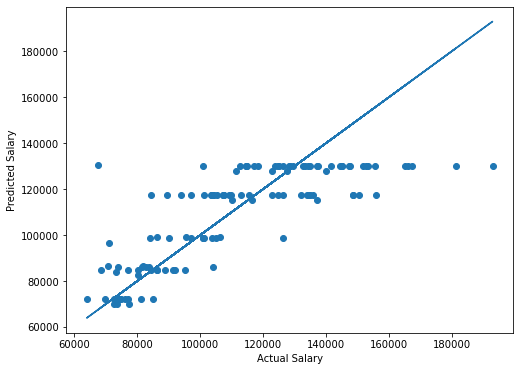

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

## Regularization

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [53]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1 ,10],
             'random_state':list(range(0,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 10, 'random_state': 0}

In [54]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

38.71364081052048

In [55]:
pred = r2_score(y_test,pred_ls)

In [56]:
pred*100

63.48698847888855

In [57]:
cv_score = cross_val_score(ls,x,y,cv = 8)
cv_mean = cv_score.mean()
cv_mean*100

43.99577770532525

## Ensemble technique

#### RandomForestRegressor

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [59]:
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2']}

In [60]:
rf = RandomForestRegressor()
grid = GridSearchCV(rf,parameters)
grid.fit(X_train,y_train)

grid.best_params_

{'criterion': 'mae', 'max_features': 'sqrt'}

In [61]:
rf = RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_decision = rf.predict(X_test)

rfs = r2_score(y_test,pred_decision)
print('r2 Score ',rfs*100 )

rfscore = cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:= ',rfc*100)

r2 Score  48.550422775351734
Cross Val Score:=  32.771170327480434


#### GradientBoostingRegressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gbtr = GradientBoostingRegressor()
gbtr.fit(X_train,y_train)

GradientBoostingRegressor()

In [63]:
y_pred = gbtr.predict(X_test)
print(r2_score(y_test,y_pred))

0.5086569654921638


In [64]:
## Hyperparameter tuning

In [65]:
parameters = {'learning_rate':[0.01,0.1,0.2,0.3,0.4],
             'min_samples_split':[2,4,6,8,10],
             'min_samples_leaf':[1,3,4,5,6,7],
             'max_depth':[5,10,15],
             }

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
rt = RandomizedSearchCV(gbtr,param_distributions=parameters)

In [68]:
rt.fit(X_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.4],
                                        'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [1, 3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 4, 6, 8, 10]})

In [69]:
rt.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 15,
 'learning_rate': 0.01}

In [70]:
gbtr = GradientBoostingRegressor(min_samples_split=10,min_samples_leaf=4,max_depth=5,learning_rate=0.02)
gbtr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=5, min_samples_leaf=4,
                          min_samples_split=10)

In [71]:
y_pred = gbtr.predict(X_test)
print(r2_score(y_test,y_pred))

0.5046399410068257


### Conclusion

###### By using LInearRegressor, we are getting model accuracy as 63.50% which show our model is performing  good.

In [72]:
import pickle
salary = 'salary_prediction.pkl'
pickle.dump(lr, open(salary, 'wb'))